# Project 1: Infrared Spectral Energy Distributions

In [2]:
# Date created: Oct 9, 2020

In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import emcee
import corner
plt.ion()
plt.rcParams.update({'font.size': 16, 'text.usetex': True})

In [2]:
# constants

h = 6.626e-34 #[J*s]
k = 1.381e-23 #[J/K]


In [3]:
# Load data for NGC 0958
#data = np.genfromtxt('photandseds.csv', delimiter=', ', names=True)

# Failed attempt, can't load the data for some reason, going to hard code it for now

<ipython-input-4-6a2e4c49f486>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


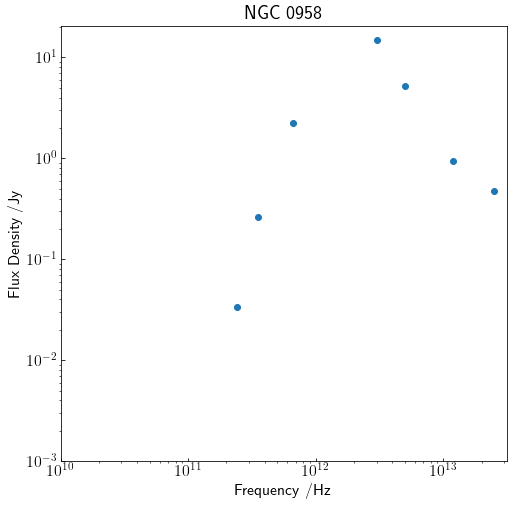

In [4]:
# hard code data, NGC 0958

frequencies_NGC = np.array([2.4e+11, 3.53e+11, 6.66e+11, 3e+12, 5e+12, 1.2e+13, 2.5e+13])
flux_densities_NGC = np.array([0.034, 0.262, 2.25, 14.99, 5.25, 0.94, 0.4735])
errors_NGC = np.array( [0.007, 0.034, 0.428, 0.212, 0.2625, 0.035, 0.0616] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_NGC, flux_densities_NGC, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('NGC 0958')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-27-aaf8a6ebd801>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


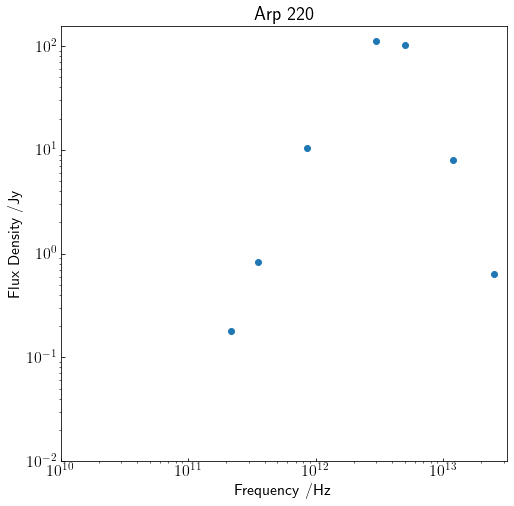

In [27]:
# Arp 220

frequencies_Arp = np.array( [2.17e+11, 3.53e+11, 8.57e+11, 3e+12, 5e+12, 1.2e+13, 2.5e+13] )
flux_densities_Arp = np.array( [0.178, 0.832, 10.5, 112, 103, 7.92, 0.64] )
errors_Arp = np.array( [0.032, 0.086, 3.3, 0.336, 0.144, 0.038, 0.029] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_Arp, flux_densities_Arp, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.01, 0.1, 1, 10, 100])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Arp 220')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show(

<ipython-input-124-8af9e0be4c97>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


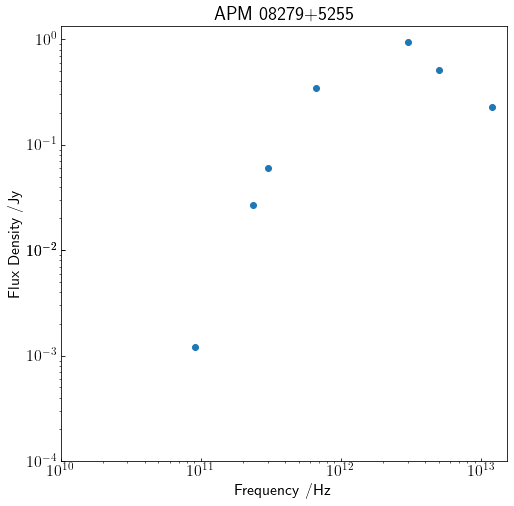

In [124]:
# APM 08279+5255

frequencies_APM = np.array( [9.08e+10, 2.37e+11, 3.02e+11, 6.66e+11, 3e+12, 5e+12, 1.2e+13] )
flux_densities_APM = np.array( [0.0012, 0.0266, 0.06, 0.342, 0.951, 0.511, 0.226] )
errors_APM = np.array( [0.00013, 0.0013, 0.012, 0.026, 0.22824, 0.0511, 0.03616] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_APM, flux_densities_APM, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.0001, 0.001, 0.01, 0.01, 0.1, 1])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('APM 08279+5255')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

In [112]:
def limit(nu, T, alpha, beta):
    return 3 + beta - ((10**nu)*h/(k*T))*np.exp(h*(10**nu)/(k*T))/(np.exp(h*(10**nu)/(k*T))-1) + alpha

def model1(freq, fit):
    L, T, alpha, beta = fit
    nu_prime = optimize.newton(limit, 13, args=(T, alpha, beta))
    L1 = ((10**L)*(10**nu_prime)**(3+beta)/(np.exp(h*(10**nu_prime)/(k*T))-1)/((10**nu_prime)**(-1*alpha)))
    predictions = []
    
    for nu in freq:
        if (nu < 10**nu_prime):
            predictions.append( 1e-26*(10**L)*(nu**(3+beta))/(np.exp(h*nu/(k*T))-1) )
        else:
            predictions.append( 1e-26*L1*(nu**(-1*alpha)) )
    return predictions

def penalty(param, freq, flux, error):
    return np.sum((model1(freq, param)-flux)**2/error**2)

def lnprob(param, freq, flux, error):
     return -0.5*penalty(param, freq, flux, error)

Optimization terminated successfully.
         Current function value: 20.570935
         Iterations: 421
         Function evaluations: 685
[-41.44103536  16.27700169   1.97852572   2.80477599]


<ipython-input-120-7196786e8194>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


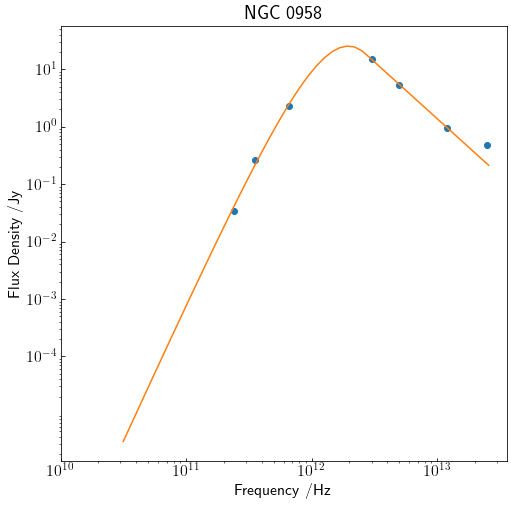

In [120]:
fit = optimize.fmin(penalty, [-32, 28.8, 2.02, 1.5], args=(frequencies_NGC, flux_densities_NGC, errors_NGC))
ngc_fit = model1(frequencies_NGC, fit)
print (fit)

#plot fit for NGC 09958
x = np.logspace(10.5,13.41000)

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_NGC, flux_densities_NGC, 'o')
ax.plot(x, model1(x,fit))
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('NGC 0958')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-119-6da9d29a3673>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-119-6da9d29a3673>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


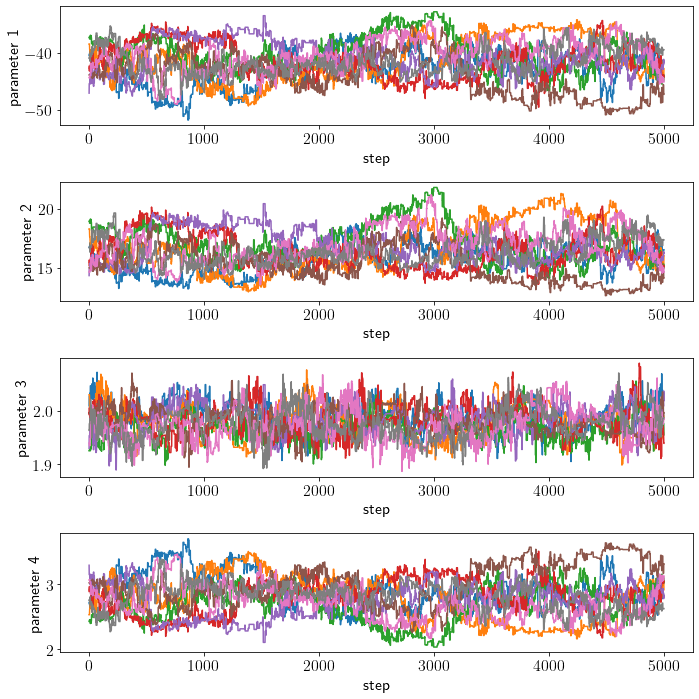

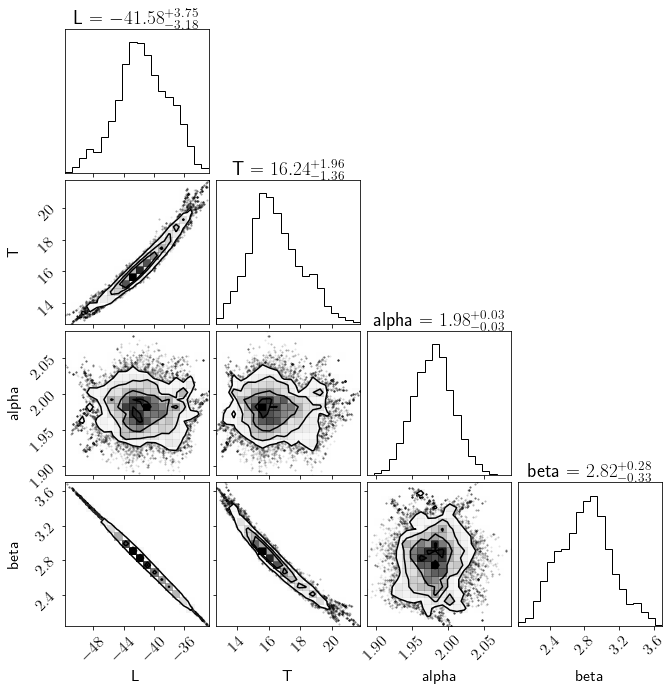

In [119]:
# Emcee run for NGC 0958 model

ndim = 4
nwalk = ndim*2
nburn = 2000
nmain = 5000

# Random starting points
p0 = np.zeros((nwalk, ndim))
for i in range(nwalk):
    p0[i] = fit + np.random.uniform(low=-0.05, high=0.05, size=4)

    
sampler = emcee.EnsembleSampler(nwalk, ndim, lnprob, args=(frequencies_NGC, flux_densities_NGC, errors_NGC))

# Burn-in run
pos,prob,state = sampler.run_mcmc(p0, nburn)

sampler.reset()

# Main run
res = sampler.run_mcmc(pos, nmain)
samples = sampler.chain.reshape((-1,ndim))

# plot the individual parameters for model
f, ax = plt.subplots(ndim, 1, figsize=(10, 10))
for idim in range(ndim):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler.chain[iwalk,:,idim])
    ax[idim].set_xlabel('step')
    ax[idim].set_ylabel('parameter {}'.format(idim+1))
f.tight_layout()
f.show()

# Plot corner plot
f = corner.corner(samples, show_titles=True, labels=('L', 'T', 'alpha', 'beta'))
f.show()

Optimization terminated successfully.
         Current function value: 58.815709
         Iterations: 146
         Function evaluations: 255
[-28.52166593  39.30788953   3.19667621   1.66054299]


<ipython-input-121-e050e42581b5>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


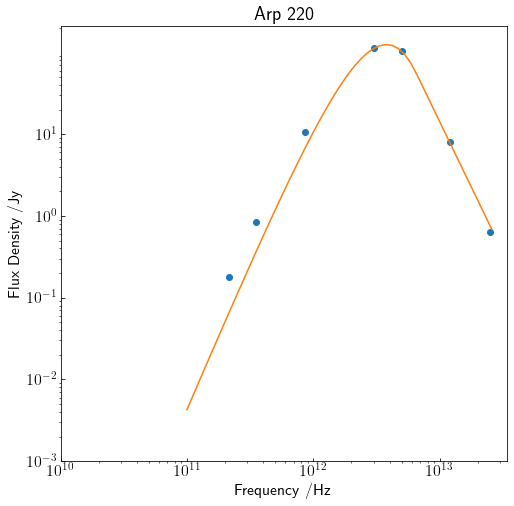

In [121]:
#fit for Arp 220
fit2 = optimize.fmin(penalty, [-31, 37.4, 2.9, 1.5], args=(frequencies_Arp, flux_densities_Arp, errors_Arp))
arp_fit = model1(frequencies_Arp, fit2)
print (fit2)

#plot fit for Arp 220
x = np.logspace(11,13.41000)

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_Arp, flux_densities_Arp, 'o')
ax.plot(x, model1(x,fit2))
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Arp 220')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-122-d3a25a72679d>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-122-d3a25a72679d>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


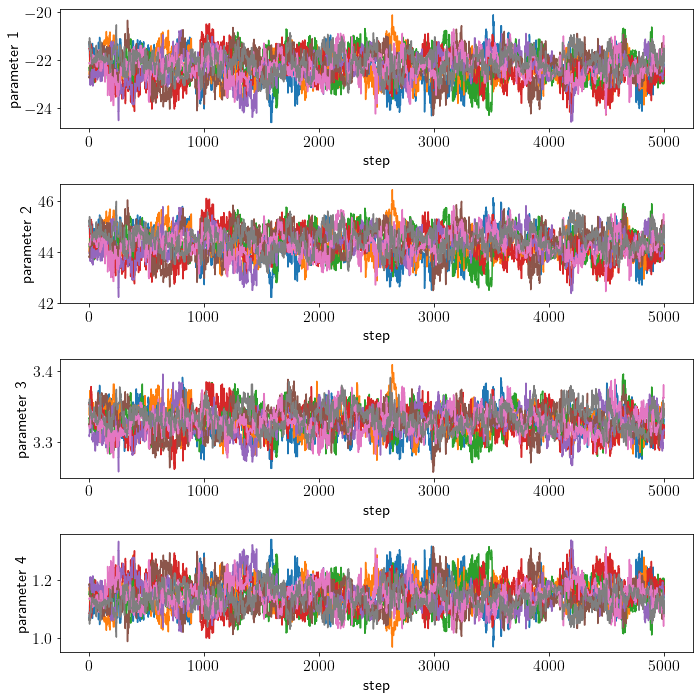

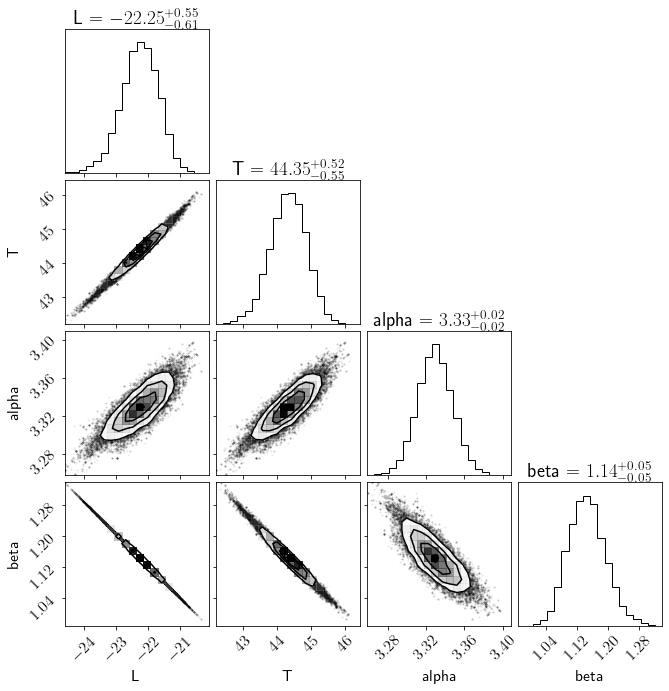

In [122]:
# Emcee run for Arp 220 model

ndim = 4
nwalk = ndim*2
nburn = 1000
nmain = 5000

# Random starting points
p0 = np.zeros((nwalk, ndim))
for i in range(nwalk):
    p0[i] = fit2 + np.random.uniform(low=-0.05, high=0.05, size=4)

    
sampler = emcee.EnsembleSampler(nwalk, ndim, lnprob, args=(frequencies_Arp, flux_densities_Arp, errors_Arp))

# Burn-in run
pos,prob,state = sampler.run_mcmc(p0, nburn)

sampler.reset()

# Main run
res = sampler.run_mcmc(pos, nmain)
samples = sampler.chain.reshape((-1,ndim))

# plot the individual parameters for model
f, ax = plt.subplots(ndim, 1, figsize=(10, 10))
for idim in range(ndim):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler.chain[iwalk,:,idim])
    ax[idim].set_xlabel('step')
    ax[idim].set_ylabel('parameter {}'.format(idim+1))
f.tight_layout()
f.show()

# Plot corner plot
f = corner.corner(samples, show_titles=True, labels=('L', 'T', 'alpha', 'beta'))
f.show()

Optimization terminated successfully.
         Current function value: 5.856039
         Iterations: 352
         Function evaluations: 588
[-23.94782895  18.99322407   0.87494256   1.24262397]


<ipython-input-126-91ead489d33b>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


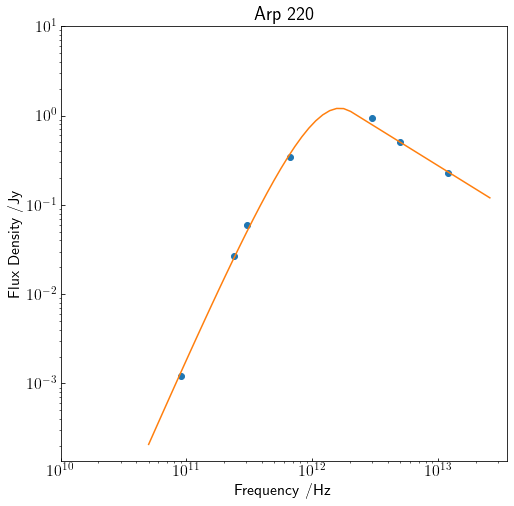

In [126]:
#fit for APM 08279+5255
fit3 = optimize.fmin(penalty, [-31, 37.4, 2.9, 1.5], args=(frequencies_APM, flux_densities_APM, errors_APM))
APM_fit = model1(frequencies_APM, fit3)
print (fit3)

#plot fit for APM 08279+5255
x = np.logspace(10.7,13.41000)

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_APM, flux_densities_APM, 'o')
ax.plot(x, model1(x,fit3))
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Arp 220')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-127-9af98ae2cd43>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-127-9af98ae2cd43>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


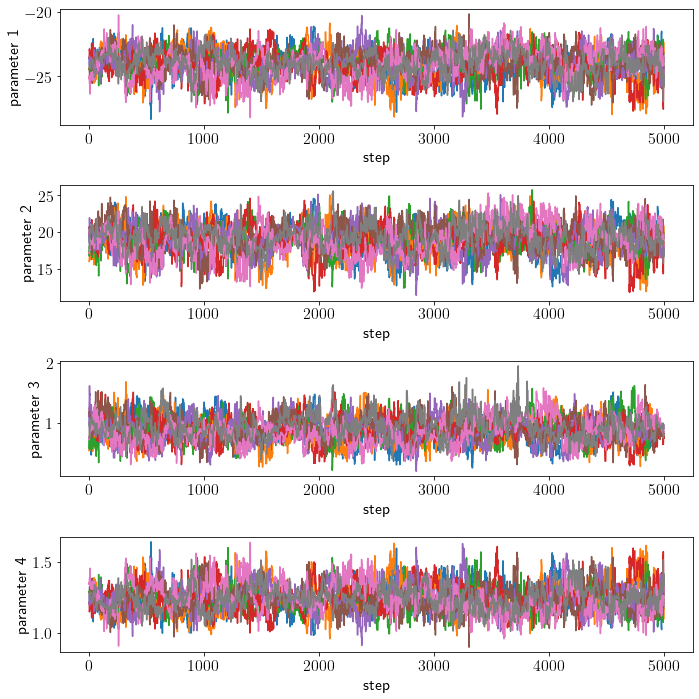

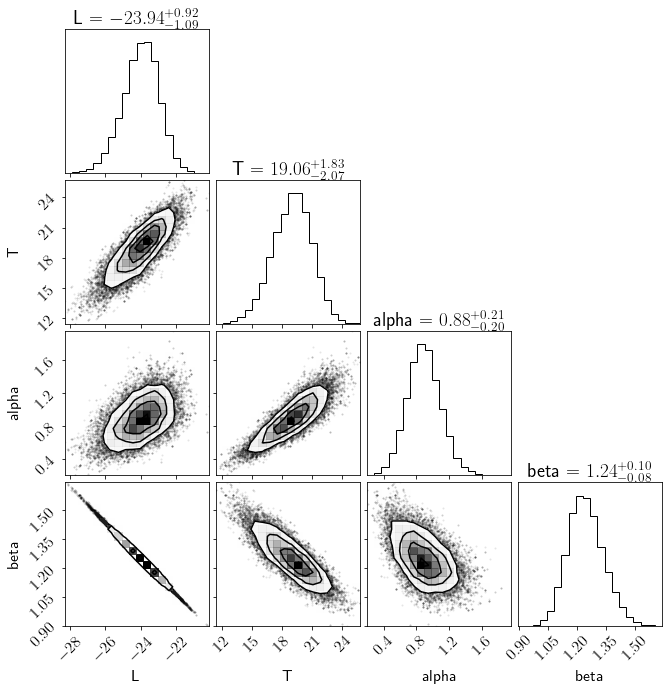

In [127]:
# Emcee run for APM 08279+5255 model

ndim = 4
nwalk = ndim*2
nburn = 1000
nmain = 5000

# Random starting points
p0 = np.zeros((nwalk, ndim))
for i in range(nwalk):
    p0[i] = fit3 + np.random.uniform(low=-0.05, high=0.05, size=4)

    
sampler = emcee.EnsembleSampler(nwalk, ndim, lnprob, args=(frequencies_APM, flux_densities_APM, errors_APM))

# Burn-in run
pos,prob,state = sampler.run_mcmc(p0, nburn)

sampler.reset()

# Main run
res = sampler.run_mcmc(pos, nmain)
samples = sampler.chain.reshape((-1,ndim))

# plot the individual parameters for model
f, ax = plt.subplots(ndim, 1, figsize=(10, 10))
for idim in range(ndim):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler.chain[iwalk,:,idim])
    ax[idim].set_xlabel('step')
    ax[idim].set_ylabel('parameter {}'.format(idim+1))
f.tight_layout()
f.show()

# Plot corner plot
f = corner.corner(samples, show_titles=True, labels=('L', 'T', 'alpha', 'beta'))
f.show()